In [9]:
import pandas_geojson as pdg
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

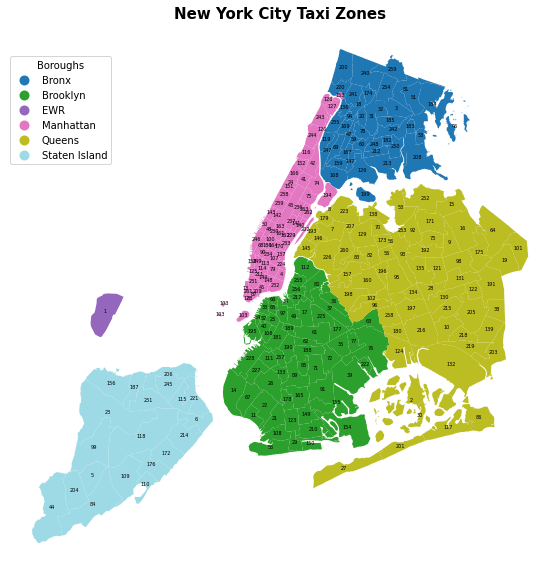

In [10]:
geojson  = gpd.read_file('/Users/paddy/Documents/GitHub/Masterthesis_ML/raw/taxi_zones/taxi_zones.geojson')
regions = pd.read_csv('/Users/paddy/Documents/GitHub/Masterthesis_ML/raw/taxi_zones/taxi+_zone_lookup.csv')

# make different colors for each region
colors = ['red', 'blue', 'green', 'yellow', 'orange', 'purple', 'pink', 'gray', 'black', 'white']

# merge the two dataframes
data = geojson.merge(regions, left_on='LocationID', right_on='LocationID')

# plot the map with LocationID as text
fig, ax = plt.subplots(1, 1, figsize=(12, 10))
data.plot(column='Borough', ax=ax, legend=True, cmap='tab20')
ax.set_title('New York City Taxi Zones', fontsize=15, fontweight='bold')

# Adding annotations for LocationID
for idx, row in data.iterrows():
    plt.annotate(text=row['LocationID'], xy=(row['geometry'].centroid.x, row['geometry'].centroid.y),
                 horizontalalignment='center', fontsize=5, color='black')

#legend top left
leg = ax.get_legend()
# set legend upper left corner but more towards the center
leg.set_bbox_to_anchor((0.2, 0.95))


leg.set_title('Boroughs')

# delete axis
ax.set_axis_off()

# save the figure
plt.savefig('/Users/paddy/Documents/GitHub/Masterthesis_ML/plots/map_boroughs.png', dpi=300, bbox_inches='tight')
